In [7]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics

In [100]:
digits = datasets.load_digits()
type(digits)


sklearn.utils.Bunch

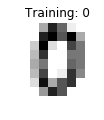

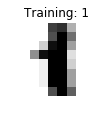

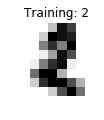

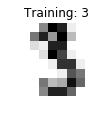

In [17]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)
    plt.show()


In [18]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [20]:
# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [292]:
# Now predict the value of the digit on the second half:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
#print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899




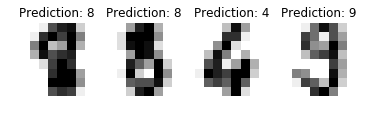

In [23]:
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

In [306]:
res = metrics.confusion_matrix(expected, predicted)
res
#type(expected)

array([[87,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 88,  1,  0,  0,  0,  0,  0,  1,  1],
       [ 0,  0, 85,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 79,  0,  3,  0,  4,  5,  0],
       [ 0,  0,  0,  0, 88,  0,  0,  0,  0,  4],
       [ 0,  0,  0,  0,  0, 88,  1,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 90,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 88,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 88,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  0, 90]], dtype=int64)

In [43]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score

In [49]:
accuracy_score(expected, predicted)

0.9688542825361512

In [68]:
# from sklearn.metrics import classification_report
import pandas as pd
h=list(classification_report(expected, predicted))
k=pd.DataFrame(h)
k.values.reshape(2, 319)

array([[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ',
        'p', 'r', 'e', 'c', 'i', 's', 'i', 'o', 'n', ' ', ' ', ' ', ' ',
        'r', 'e', 'c', 'a', 'l', 'l', ' ', ' ', 'f', '1', '-', 's', 'c',
        'o', 'r', 'e', ' ', ' ', ' ', 's', 'u', 'p', 'p', 'o', 'r', 't',
        '\n', '\n', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ',
        '0', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '1', '.', '0', '0', ' ',
        ' ', ' ', ' ', ' ', ' ', '0', '.', '9', '9', ' ', ' ', ' ', ' ',
        ' ', ' ', '0', '.', '9', '9', ' ', ' ', ' ', ' ', ' ', ' ', ' ',
        ' ', '8', '8', '\n', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ',
        ' ', '1', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '0', '.', '9', '9',
        ' ', ' ', ' ', ' ', ' ', ' ', '0', '.', '9', '7', ' ', ' ', ' ',
        ' ', ' ', ' ', '0', '.', '9', '8', ' ', ' ', ' ', ' ', ' ', ' ',
        ' ', ' ', '9', '1', '\n', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ',
        ' ', ' ', '2', ' ', ' ', ' ', ' ', ' ', ' ',

In [80]:
df1 = pd.DataFrame(expected)
df2 = pd.DataFrame(expected)

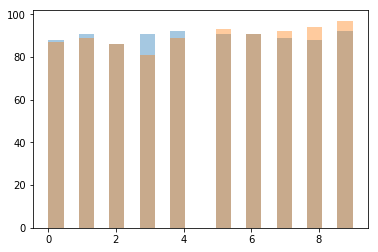

In [77]:
import seaborn as sns
sns.distplot(expected,bins=20,kde=False)
sns.distplot(predicted,bins=20,kde=False)
plt.show()

In [82]:
df1['pred'] = df2[0]

In [83]:
df1.head()

,0,pred
0,8,8
1,8,8
2,4,4
3,9,9
4,0,0


In [84]:
df1_numpy = df1.values

In [85]:
df1_numpy

array([[8, 8],
       [8, 8],
       [4, 4],
       ...,
       [8, 8],
       [9, 9],
       [8, 8]])

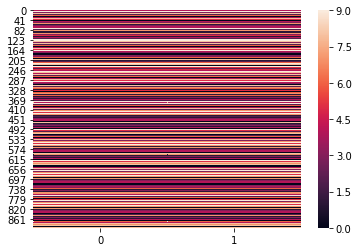

In [86]:

heat_map = sns.heatmap(df1_numpy)
plt.show()

In [ ]:
################################compare and then predict an image#######################

In [117]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img2 = mpimg.imread('11.JPG')
img2

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [248, 248, 248],
        [255, 255, 255],
        [249, 249, 249]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [244, 244, 244],
        [255, 255, 255],
        [252, 252, 252]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [240, 240, 240],
        [253, 253, 253],
        [254, 254, 254]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [253, 253, 253],
        [226, 226, 226],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [253, 253, 253],
        [226, 226, 226],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [253, 253, 253],
        [226, 226, 226],
        [255, 255, 255]]

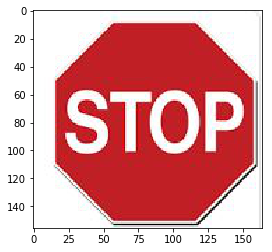

In [118]:
imgplot = plt.imshow(img2)
imgplot
plt.show()

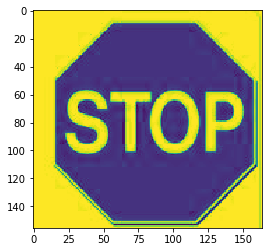

In [153]:
lum_img1 = img2[:, :,1]
plt.imshow(lum_img)
plt.show()

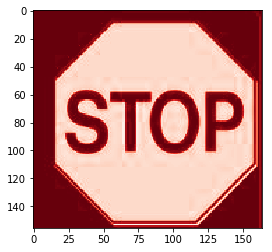

In [148]:
fg2 = plt.imshow(lum_img, cmap="Reds")
plt.show()

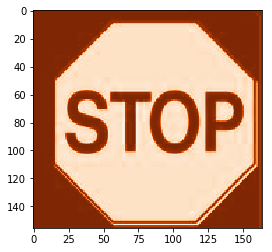

In [149]:
fg2=plt.imshow(lum_img, cmap="Oranges")
plt.show()

In [134]:
fg = plt.imshow(lum_img, cmap="Blues")


In [140]:
type(fg)

matplotlib.image.AxesImage

In [161]:
fg1=np.array(fg)

In [164]:
type(fg1)


numpy.ndarray

In [165]:
fg1

array(<matplotlib.image.AxesImage object at 0x0000018B56BF6B00>,
      dtype=object)

In [387]:
#####################implementation #############################

In [388]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sklearn.datasets
imug1 = mpimg.imread('50.png')
imug2 = mpimg.imread('100.png')
imug3 = mpimg.imread('100.png')

In [389]:
l1=list(imug1)
type(l1)
l2=list(imug2)
l3=list(imug3)

In [390]:
# Create a dataframe from zipped list
type(l2)

list

In [391]:
import numpy as np
import sklearn.datasets

examples = []
examples.append('some text')
examples.append('another example text')
examples.append('example 3')

target = np.zeros((3,), dtype=np.int64)
target[0] = 0
target[1] = 1
target[2] = 0
dataset = sklearn.datasets.base.Bunch(data=examples, target=target)

In [392]:
dataset

{'data': ['some text', 'another example text', 'example 3'],
 'target': array([0, 1, 0], dtype=int64)}

In [393]:
type(dataset)

sklearn.utils.Bunch

In [394]:
type(examples)

list

In [395]:
import numpy as np
import sklearn.datasets

#examples = []
#examples.append('some text')
#examples.append('another example text')
#examples.append('example 3')

#target = np.zeros((3,), dtype=np.int64)
#target[0] = 0
#target[1] = 1
#target[2] = 0
dl1 = sklearn.datasets.base.Bunch(data=l1)
dl2 = sklearn.datasets.base.Bunch(data=l2)

In [397]:
import numpy as np
import sklearn.datasets
dl2 = sklearn.datasets.base.Bunch(data=l2)

In [399]:
import numpy as np
import sklearn.datasets
dl3 = sklearn.datasets.base.Bunch(data=l3)

In [401]:
from sklearn.linear_model import LinearRegression


In [402]:
linear_regressor = LinearRegression()
imug1.shape
imug2.shape

(32, 32, 3)

In [403]:
####most important thing image numpy array reshaping########

In [404]:
imug1_new=imug1.transpose(2,0,1).reshape(3,-1)
imug2_new=imug2.transpose(2,0,1).reshape(3,-1)

In [405]:
print(imug1_new.shape)
print(imug2_new.shape)

(3, 1024)
(3, 1024)


In [406]:
train=pd.DataFrame(imug1_new)
test=pd.DataFrame(imug2_new)

In [407]:
tf = train.transpose()
tf.head()

,0,1,2
0,0.600000,0.603922,0.556863
1,0.654902,0.588235,0.490196
2,0.815686,0.756863,0.654902
3,0.674510,0.658824,0.596078
4,0.768627,0.741176,0.666667


In [408]:
tt = test.transpose()
tt.head()

,0,1,2
0,0.600000,0.603922,0.556863
1,0.654902,0.588235,0.490196
2,0.815686,0.756863,0.654902
3,0.674510,0.658824,0.596078
4,0.768627,0.741176,0.666667


In [409]:
X_numpy = tf.values
Y_numpy = tt.values

In [410]:
model = linear_regressor.fit(X_numpy, Y_numpy)
Y_pred = linear_regressor.predict(X_numpy) 

In [411]:
Y_pred

array([[0.59998417, 0.60380054, 0.55666167],
       [0.65482825, 0.58822775, 0.48997256],
       [0.8156551 , 0.7568811 , 0.6547865 ],
       ...,
       [0.7762312 , 0.5610672 , 0.32124874],
       [0.78406584, 0.5650033 , 0.31732145],
       [0.8272048 , 0.6042385 , 0.34871382]], dtype=float32)

In [412]:
Y_pred = pd.DataFrame(Y_pred)

In [413]:
Y_pred.head()

,0,1,2
0,0.599984,0.603801,0.556662
1,0.654828,0.588228,0.489973
2,0.815655,0.756881,0.654787
3,0.674493,0.658745,0.595912
4,0.768622,0.741134,0.666552


In [414]:
model.intercept_

array([-0.00012916, -0.00027686, -0.00055969], dtype=float32)

In [415]:
model.coef_

array([[ 1.0002147e+00, -1.2639047e-03,  1.3428937e-03],
       [ 5.6114903e-04,  1.0010774e+00, -1.4932578e-03],
       [ 9.8822475e-04, -1.8496783e-03,  1.0015851e+00]], dtype=float32)

In [416]:
import sklearn
from sklearn import metrics
test_rmse= np.sqrt(metrics.mean_squared_error(Y_pred,tt))

In [417]:
type(test_rmse)


numpy.float32

In [321]:
import scipy.misc
Y_pred.shape
import imageio
Y_pred2 = Y_pred.values
imageio.imwrite('picture_out.jpg', Y_pred2)

C:\Users\Ted\Anaconda3\lib\site-packages\imageio\core\util.py:104: UserWarning: Conversion from float32 to uint8, range [-0.000559687614440918, 1.00016450881958]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))


In [418]:
test_rmse

##############first finding###############

0.0013286355

In [419]:
Y_numpy


array([[0.6       , 0.6039216 , 0.5568628 ],
       [0.654902  , 0.5882353 , 0.49019608],
       [0.8156863 , 0.75686276, 0.654902  ],
       ...,
       [0.7764706 , 0.56078434, 0.32156864],
       [0.78431374, 0.5647059 , 0.31764707],
       [0.827451  , 0.6039216 , 0.34901962]], dtype=float32)

In [420]:
Y_pred2

array([[0.59998417, 0.60380054, 0.55666167],
       [0.65482825, 0.58822775, 0.48997256],
       [0.8156551 , 0.7568811 , 0.6547865 ],
       ...,
       [0.7762312 , 0.5610672 , 0.32124874],
       [0.78406584, 0.5650033 , 0.31732145],
       [0.8272048 , 0.6042385 , 0.34871382]], dtype=float32)

In [421]:
cutoff = 0.7
y_pred_classes = np.zeros_like(Y_pred2)
y_pred_classes[Y_pred2 > cutoff] = 1

y_pred_classes

array([[0., 0., 0.],
       [0., 0., 0.],
       [1., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [422]:
y_test_classes = np.zeros_like(Y_pred2)
y_test_classes[Y_numpy > cutoff] = 1

y_test_classes

array([[0., 0., 0.],
       [0., 0., 0.],
       [1., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [423]:
#############Accuracy calculation############

In [424]:
from sklearn.metrics import accuracy_score


model.score(y_test_classes, y_pred_classes)

0.9999989415671284

In [425]:

#plot_confusion_matrix(y_test, y_pred, classes=class_names,title='Confusion matrix, without normalization')

In [426]:
from sklearn.metrics import confusion_matrix


In [427]:
cm = confusion_matrix(y_test_classes.argmax(axis=1), y_pred_classes.argmax(axis=1))

In [428]:
cm

array([[1024]], dtype=int64)

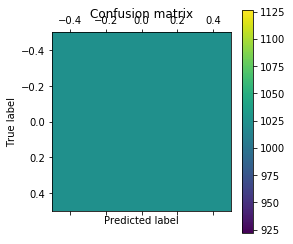

In [429]:
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
##########Validation Curve for learning ############

In [439]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import validation_curve

In [441]:
train_scores, valid_scores = validation_curve(Ridge(), y_test_classes, y_pred_classes, "alpha",np.logspace(-7, 3, 3),cv=5)

In [442]:
train_scores

array([[1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.99999973, 0.99999997, 0.99999996, 0.99999997, 0.99999997],
       [0.33810355, 0.31429129, 0.28277663, 0.31786081, 0.34403597]])

In [467]:
valid_scores

array([[1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.99998611, 0.99999999, 0.99999998, 0.99999999, 0.99999998],
       [0.27499187, 0.30310185, 0.16548102, 0.32326478, 0.18034844]])

In [444]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

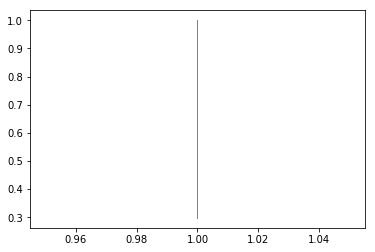

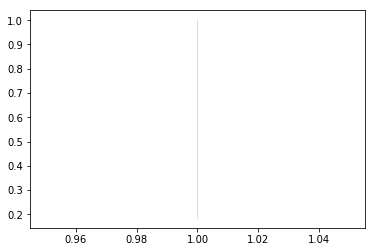

In [466]:
param_range = np.arange(1,3,5)
plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color="gray")
plt.show()
plt.fill_between(param_range, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, color="gainsboro")
plt.show()

In [468]:
#########R square ##############

In [469]:
from sklearn.metrics import r2_score
r2_score(y_pred_classes,y_test_classes)

1.0